# Descripción del proyecto

## Contexto

**Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.
Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.**

## Descripción de los datos

**Datos utilizados en la primera parte del proyecto**

- /datasets/hypotheses_us.csv Descarga el dataset

- Hypotheses: breves descripciones de las hipótesis

- Reach: alcance del usuario, en una escala del uno a diez

- Impact: impacto en los usuarios, en una escala del uno al diez

- Confidence: confianza en la hipótesis, en una escala del uno al diez

- Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

**Datos utilizados en la segunda parte del proyecto**

- /datasets/orders_us.csv Descarga el dataset
- transactionId: identificador de pedido
- visitorId: identificador del usuario que realizó el pedido
- date: fecha del pedido
- revenue: ingresos del pedido
- group: el grupo del test A/B al que pertenece el usuario

- /datasets/visits_us.csv Descarga el dataset
- date: la fecha
- group: grupo del test A/B
- visits: el número de visitas en la fecha especificada para el grupo de test A/B especificado

In [361]:
import matplotlib.pyplot as plt
from scipy import stats as st
import statsmodels.api as sm
import scipy.stats as stats
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [362]:
try:
    hypothesis = pd.read_csv(r'C:\Users\seba\Desktop\Datasets\hypotheses_us.csv', sep=';')
    orders = pd.read_csv(r'C:\Users\seba\Desktop\Datasets\orders_us.csv')
    visits = pd.read_csv(r'C:\Users\seba\Desktop\Datasets\visits_us.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypotheses_us.csv')
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')
    

### hypothesis

In [363]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [364]:
hypothesis.columns = hypothesis.columns.str.lower()

In [365]:
hypothesis.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [366]:
#Porcentaje de datos Nulos
round(hypothesis.isnull().mean() * 100, 2)

hypothesis    0.0
reach         0.0
impact        0.0
confidence    0.0
effort        0.0
dtype: float64

In [367]:
#Porcentaje de datos duplicados
round(hypothesis.duplicated().mean() * 100, 2)

0.0

### orders

In [368]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [369]:
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)

In [370]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1197 non-null   int64  
 1   visitor_id      1197 non-null   int64  
 2   date            1197 non-null   object 
 3   revenue         1197 non-null   float64
 4   group           1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


In [371]:
#Porcentaje de datos Nulos
round(orders.isnull().mean() * 100, 2)

transaction_id    0.0
visitor_id        0.0
date              0.0
revenue           0.0
group             0.0
dtype: float64

In [372]:
#Porcentaje de datos duplicados
round(orders.duplicated().mean() * 100, 2)

0.0

In [373]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [374]:
#Chequear si resultó
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


### Visits

In [375]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [376]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [377]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [378]:
#Porcentaje de datos Nulos
round(orders.isnull().mean() * 100, 2)

transaction_id    0.0
visitor_id        0.0
date              0.0
revenue           0.0
group             0.0
dtype: float64

In [379]:
#Porcentaje de datos duplicados
round(orders.duplicated().mean() * 100, 2)

0.0

In [380]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


# Parte 1. Priorizar hipótesis

### Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [381]:
hypothesis['ice_score'] = round((hypothesis['impact'] * hypothesis['confidence'] / hypothesis['effort']), 2)
hypothesis[['hypothesis', 'ice_score']].sort_values(by='ice_score', ascending=False)

,hypothesis,ice_score
8,Launch a promotion that gives users discounts ...,16.20
0,Add two new channels for attracting traffic. T...,13.33
7,Add a subscription form to all the main pages....,11.20
6,Show banners with current offers and sales on ...,8.00
2,Add product recommendation blocks to the store...,7.00
1,Launch your own delivery service. This will sh...,2.00
5,Add a customer review page. This will increase...,1.33
3,Change the category structure. This will incre...,1.12
4,Change the background color on the main page. ...,1.00


**Conclusión**

**Las hipótesis que debemos priorizar según el ICE: 8, 0, 7**

### Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [382]:
hypothesis['rice_score'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['effort']
hypothesis[['hypothesis', 'reach', 'ice_score', 'rice_score']].sort_values(by='rice_score', ascending=False)

,hypothesis,reach,ice_score,rice_score
7,Add a subscription form to all the main pages....,10,11.20,112.0
2,Add product recommendation blocks to the store...,8,7.00,56.0
0,Add two new channels for attracting traffic. T...,3,13.33,40.0
6,Show banners with current offers and sales on ...,5,8.00,40.0
8,Launch a promotion that gives users discounts ...,1,16.20,16.2
3,Change the category structure. This will incre...,8,1.12,9.0
1,Launch your own delivery service. This will sh...,2,2.00,4.0
5,Add a customer review page. This will increase...,3,1.33,4.0
4,Change the background color on the main page. ...,3,1.00,3.0


**Conclusión**

**Las hipótesis que debemos priorizar según el RICE: 7, 2, 0**

### Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

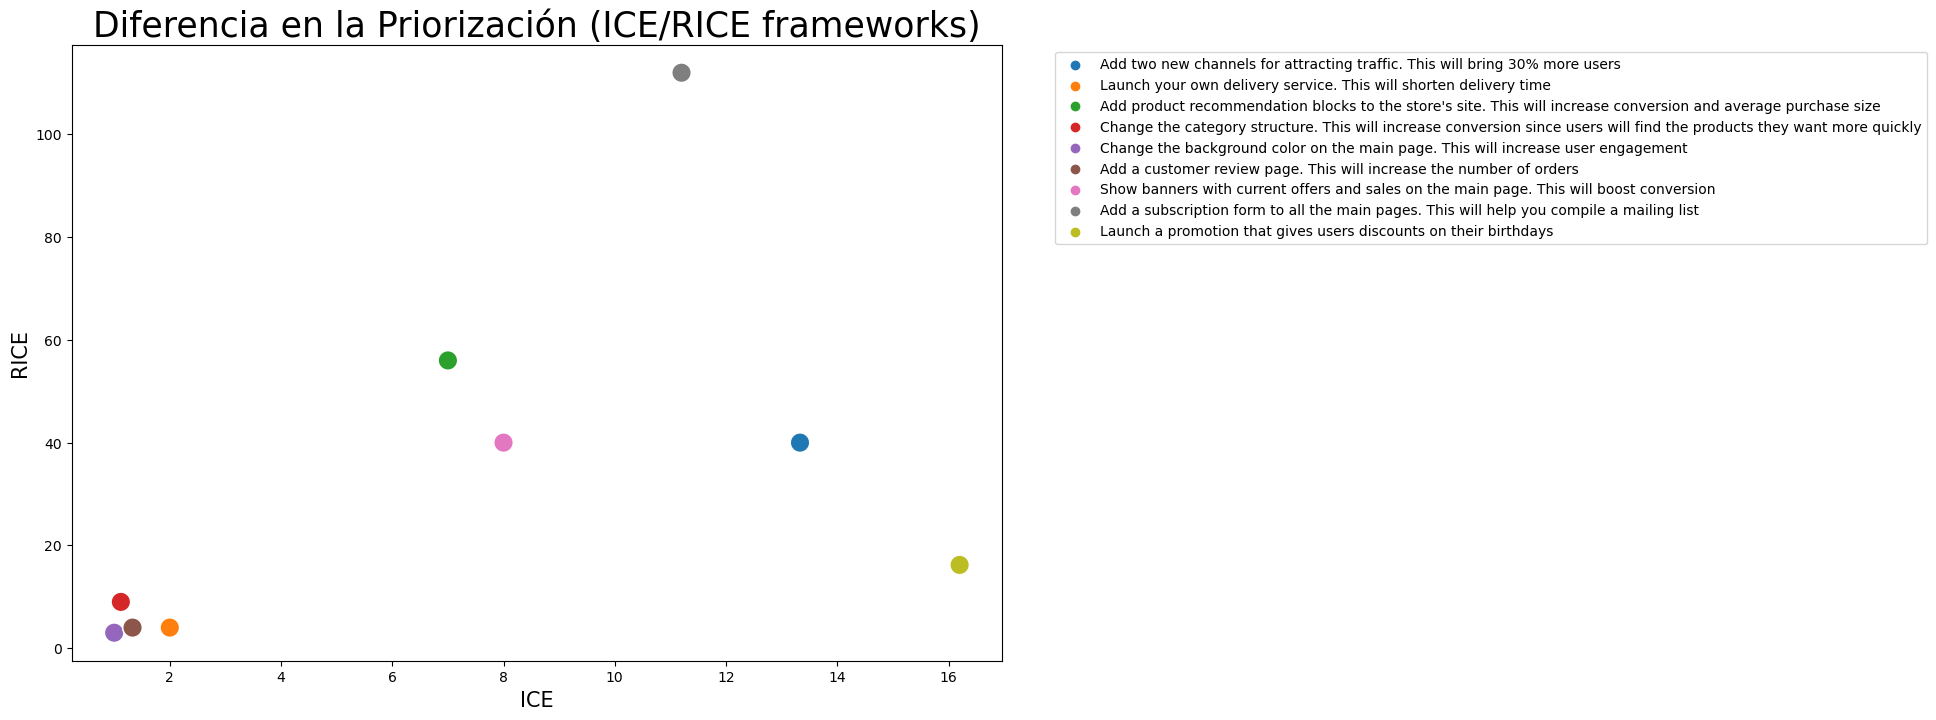

In [383]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=hypothesis, x='ice_score', y='rice_score', hue='hypothesis', s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Diferencia en la Priorización (ICE/RICE frameworks)', fontsize=25)
plt.ylabel('RICE', fontsize=15)
plt.xlabel('ICE', fontsize=15)
plt.show()

**Conclusión**

**La prioridad de las hipótesis difiere para los marcos ICE y RICE. Las hipótesis 7 y 0 están entre las 3 primeras en ambos casos. Falta la octava hipótesis en el top 3 según el RICE (y aparece la segunda). De hecho, el marco RICE tiene en cuenta el parámetro Alcance: cuántos usuarios se verán afectados por el cambio que queremos realizar. La segunda hipótesis tiene una puntuación de alcance de 8\10, mientras que la octava tiene solo 1\10. Este parámetro es suficientemente importante para priorizar las hipótesis según el impacto en las personas**

# Parte 2. Análisis de test A/B

### Realizaste un test A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visitors_us.csv

### Se preparan los dataframe para poder trabajar en las preguntas

In [384]:
df_a = orders[orders['group'] == 'A']
df_a

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...
1187,2274188238,132143192,2019-08-14,15.5,A
1188,1692103379,1022829655,2019-08-14,5.7,A
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [385]:
df_b = orders[orders['group'] == 'B']
df_b

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1189,4082620617,393266494,2019-08-14,490.4,B
1190,38478481,1197745035,2019-08-14,135.3,B
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B


In [386]:
df_ab = df_a[df_a['visitor_id'].isin(df_b['visitor_id'])]
df_ab

,transaction_id,visitor_id,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
26,2223239646,199603092,2019-08-15,55.7,A
29,2220299125,3803269165,2019-08-15,15.8,A
33,486237576,2378935119,2019-08-15,30.4,A
41,2594268419,237748145,2019-08-15,20.8,A
...,...,...,...,...,...
1167,3757656646,4186807279,2019-08-14,80.8,A
1173,3612788481,2712142231,2019-08-14,40.3,A
1178,4052155355,2949041841,2019-08-14,5.9,A
1183,1458356232,963407295,2019-08-14,80.0,A


In [387]:
filtered = orders[~orders['visitor_id'].isin(df_ab['visitor_id'])].reset_index(drop=True)
filtered

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,3797467345,1196621759,2019-08-15,155.1,B
3,2282983706,2322279887,2019-08-15,40.5,B
4,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,255.7,B
1012,2662137336,3733762160,2019-08-14,100.8,B
1013,2203539145,370388673,2019-08-14,50.1,A
1014,1807773912,573423106,2019-08-14,165.3,A


In [388]:
#construir una matriz con valores únicos de fecha y grupos
datesgroups = filtered[['date','group']].drop_duplicates() 

#obtener datos acumulados agregados sobre pedidos
ordersaggregated = datesgroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#obtener datos acumulados agregados sobre los visitantes
visitorsaggregated = datesgroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Fusionamos estas 2 tablas y cambiamos los nombres de las columnas
cumulativedata = ordersaggregated.merge(visitorsaggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativedata.columns = ['date', 'group', 'orders', 'visitor_id', 'revenue', 'visits']

cumulativedata.head()


,date,group,orders,visitor_id,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [389]:
#DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativerevenueA = cumulativedata[cumulativedata['group']=='A'][['date','revenue', 'orders']]

#DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativerevenueB = cumulativedata[cumulativedata['group']=='B'][['date','revenue', 'orders']]

### 1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

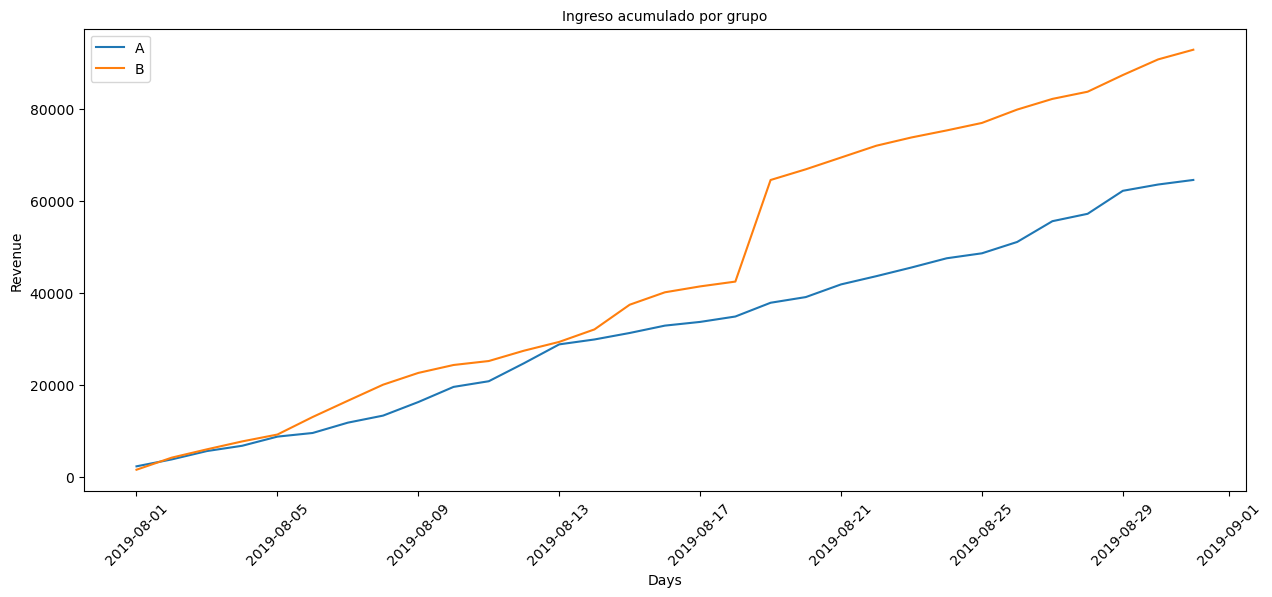

In [390]:
plt.figure(figsize=(15, 6))

plt.title('Ingreso acumulado por grupo', fontdict={'size':10}) 
#Trazado del gráfico de ingresos del grupo A 
plt.plot(cumulativerevenueA['date'], cumulativerevenueA['revenue'], label='A')
#Trazado del gráfico de ingresos del grupo B 
plt.plot(cumulativerevenueB['date'], cumulativerevenueB['revenue'], label='B')

plt.ylabel('Revenue') 
plt.xlabel('Days') 

plt.xticks(rotation = 45)
plt.legend() 

plt.show();

**Conclusión**

**Vemos un cambio significativo entre los grupos después de 18 días cuando el grupo B tiene un aumento de los ingresos en comparación con el grupo A.**

### 2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.


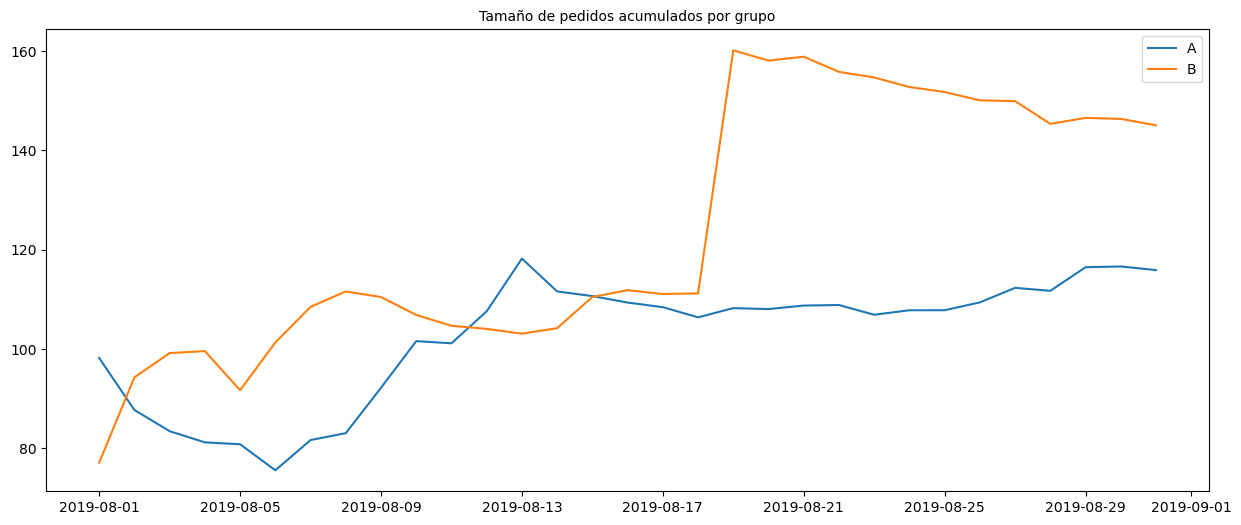

In [391]:
plt.figure(figsize=(15, 6))

plt.title('Tamaño de pedidos acumulados por grupo', fontdict={'size':10})

plt.plot(cumulativerevenueA['date'], cumulativerevenueA['revenue']/cumulativerevenueA['orders'], label='A')

plt.plot(cumulativerevenueB['date'], cumulativerevenueB['revenue']/cumulativerevenueB['orders'], label='B')


plt.legend() 
plt.show();

**Conclusión**

**Después de 18 días de prueba, el número de pedidos del grupo B pasó de 110 a 160, lo que distinguió a B de A y afectó sus ingresos generales.**

### 3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [392]:
cumulativerevenueA['cumul_orders']=cumulativerevenueA['orders'].cumsum()
cumulativerevenueA['cumul_avg']=cumulativerevenueA['revenue']/cumulativerevenueA['cumul_orders']
cumulativerevenueA.head()

,date,revenue,orders,cumul_orders,cumul_avg
0,2019-08-01,2356.8,24,24,98.200000
2,2019-08-02,3860.3,44,68,56.769118
4,2019-08-03,5675.5,68,136,41.731618
6,2019-08-04,6822.1,84,220,31.009545
8,2019-08-05,8810.2,109,329,26.778723


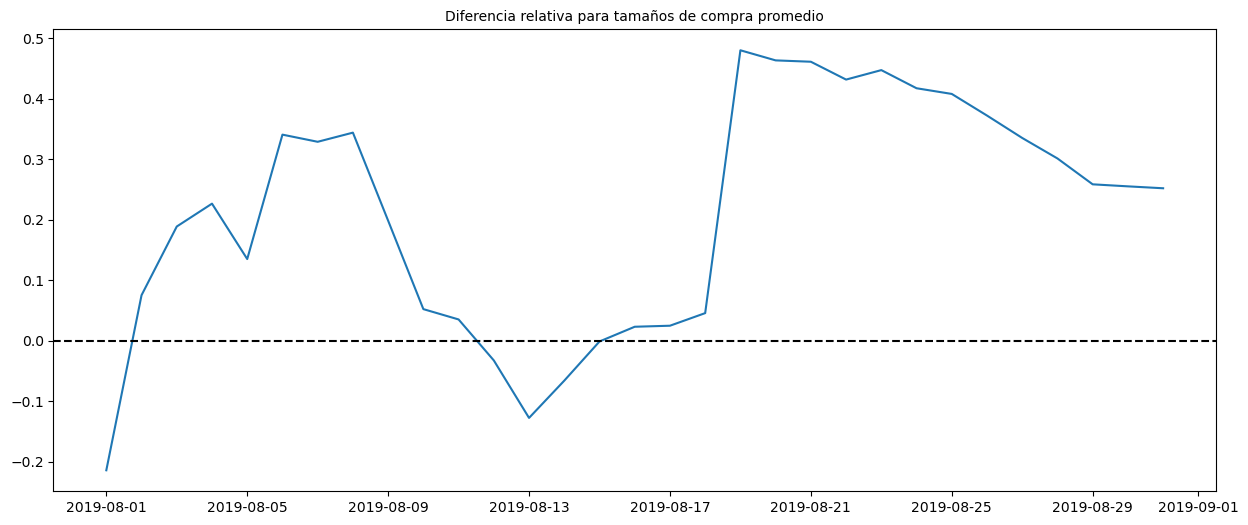

In [393]:
#Recopilar los datos en un DataFrame
mergedcumulativerevenue = cumulativerevenueA.merge(cumulativerevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#trazado de un gráfico de diferencia relativa para los tamaños de compra promedio
plt.figure(figsize=(15, 6))
plt.title('Diferencia relativa para tamaños de compra promedio', fontdict={'size':10})
plt.plot(mergedcumulativerevenue['date'], (mergedcumulativerevenue['revenueB']/mergedcumulativerevenue['ordersB'])/(mergedcumulativerevenue['revenueA']/mergedcumulativerevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--');

**Conclusión**

**En el gráfico vemos que el grupo B fue más alto en tamaño de pedido promedio, la mayoría de la prueba, aunque tiene una pequeña caída por debajo del promedio del grupo A.**

### 4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

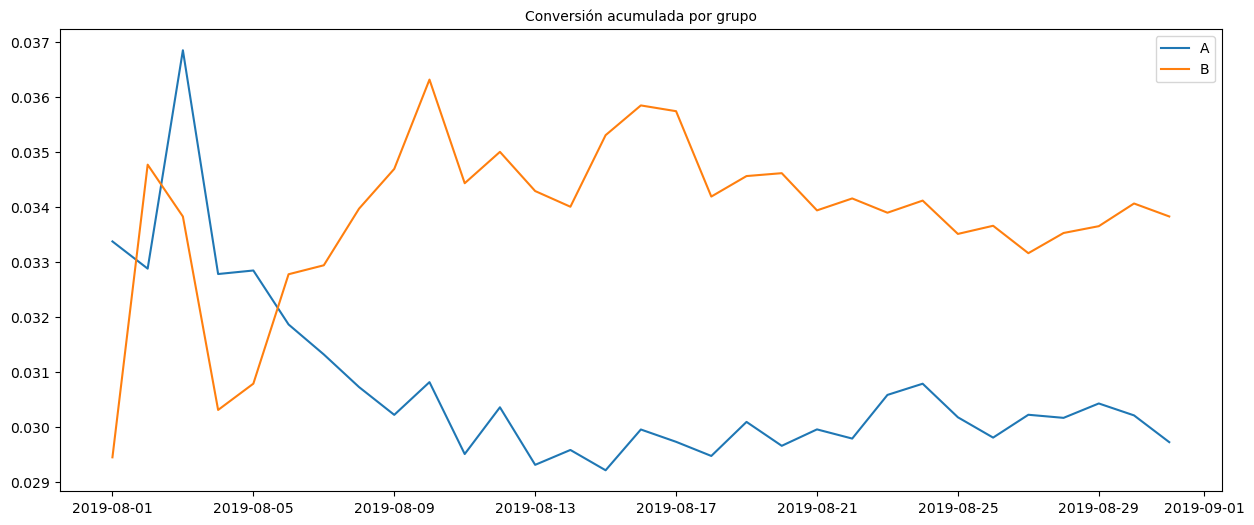

In [394]:
#calcular la conversión acumulada
cumulativedata['conversion'] = cumulativedata['orders']/cumulativedata['visits']

#seleccionar datos en el grupo A
cumulativedataA = cumulativedata[cumulativedata['group']=='A']
cumulativedataA['conversion'] = cumulativedataA['orders']/cumulativedataA['visits']

#seleccionar datos en el grupo B
cumulativedataB = cumulativedata[cumulativedata['group']=='B']
cumulativedataB['conversion'] = cumulativedataB['orders']/cumulativedataB['visits']

#Gráficos
plt.figure(figsize=(15, 6))
plt.title('Conversión acumulada por grupo', fontdict={'size':10})
plt.plot(cumulativedataA['date'], cumulativedataA['conversion'], label='A')
plt.plot(cumulativedataB['date'], cumulativedataB['conversion'], label='B')
plt.legend()


plt.show();

**Parecía haber un pico en ambos grupos que se estabilizó después del 2019-08-05. podemos arreglarlo refinando los datos para que sean a partir de la fecha en que los hallazgos se estabilizan más, precisaría nuestros hallazgos y nos permitiría mostrar mejores gráficos a lo largo de nuestro análisis. Pero también podemos dejarlo así.**

In [395]:
groupA_new=cumulativedataA[cumulativedataA['date']>'2019-08-05']

groupB_new=cumulativedataB[cumulativedataB['date']>'2019-08-05']

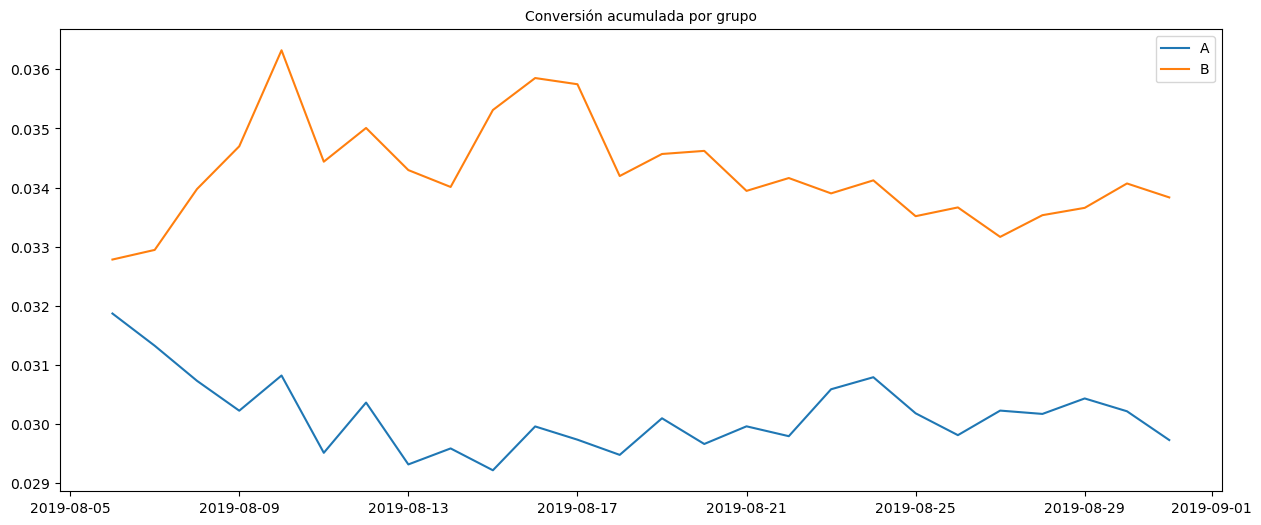

In [396]:
plt.figure(figsize=(15, 6))
plt.title('Conversión acumulada por grupo', fontdict={'size':10})
plt.plot(groupA_new['date'], groupA_new['conversion'], label='A')
plt.plot(groupB_new['date'], groupB_new['conversion'], label='B')
plt.legend()
plt.show();

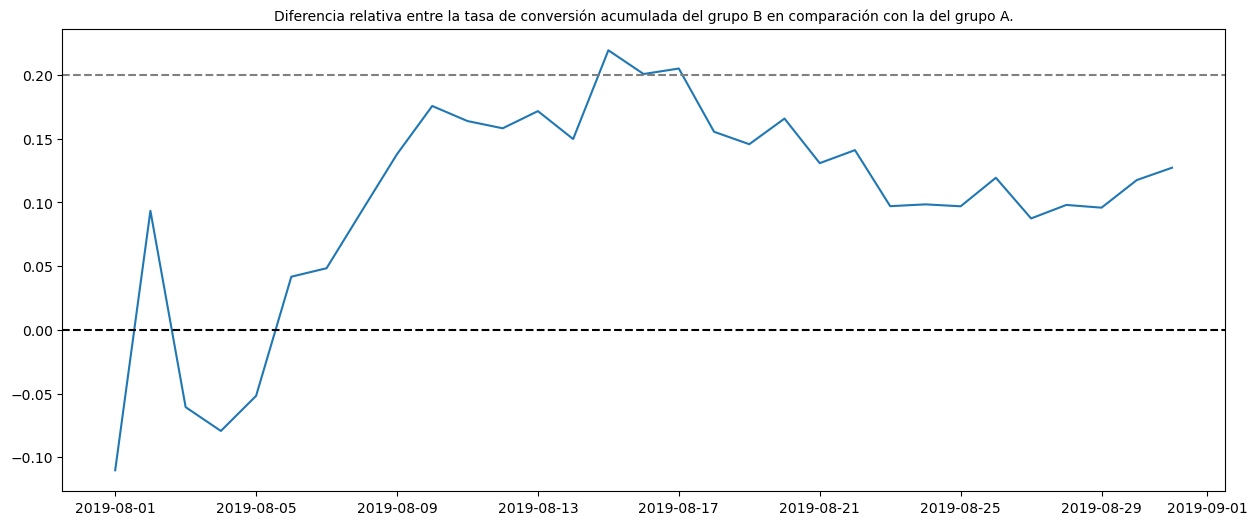

In [397]:
#Trazar un gráfico de diferencia relativa para las tasas de conversión acumuladas y el tamaño del pedido

mergedcumulativeconversion = cumulativedataA.merge(cumulativedataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#Trazado de un gráfico de diferencia relativa para los tamaños de compra promedio
plt.figure(figsize=(15, 6))
plt.title('Diferencia relativa entre la tasa de conversión acumulada del grupo B en comparación con la del grupo A.', fontdict={'size':10})
plt.plot(mergedcumulativeconversion['date'], (mergedcumulativeconversion['conversionB']/mergedcumulativeconversion['visitsB'])/(mergedcumulativeconversion['conversionA']/mergedcumulativeconversion['visitsA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--');

**Como vemos en este gráfico. la conversión del grupo B es mejor que la del grupo A, ya que se estabiliza un 10% más.**

### 5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [398]:
# Vamos a buscar el número de pedidos por usuario e imprimir el resultado:
ordersByUsers = (
    filtered.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


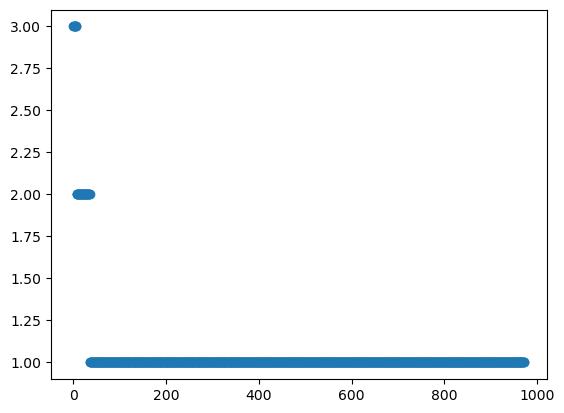

In [399]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders']);

**Vemos que la gran mayoría de los usuarios realizan solo 1 pedido. Aunque existen algunos valores atípicos que realizaron 2 o 3 pedidos**

### 6. Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [400]:
print(np.percentile(orders_by_users['orders'], [95,99]))

[1. 2.]


**Solo el 1% o los usuarios realizan más de 4 pedidos, el 5% superior realiza más de 2 pedidos. La mayoría de los usuarios hasta el 90% hacen solo 1 pedido. todo lo que esté por encima de 2 órdenes se considera un valor atípico, por encima del percentil 95.**

### 7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

In [401]:
filtered['revenue'].describe()

count     1016.000000
mean       130.770866
std        648.079810
min          5.000000
25%         20.775000
50%         50.100000
75%        126.950000
max      19920.400000
Name: revenue, dtype: float64

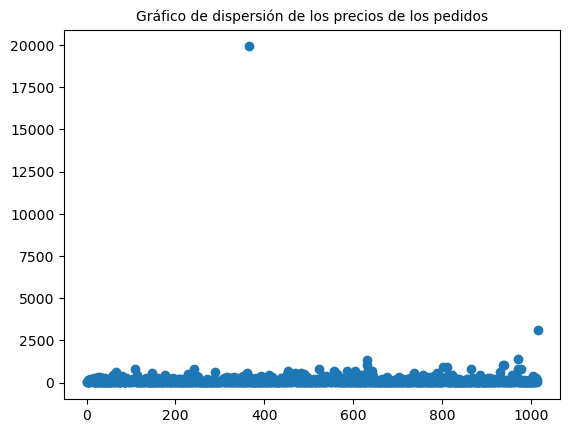

In [402]:
x_values = pd.Series(range(0, len(filtered['revenue'])))
plt.title('Gráfico de dispersión de los precios de los pedidos', fontdict={'size':10})
plt.scatter(x_values, filtered['revenue']);

**Si bien el promedio de ingresos por usuario es de 50, la media es casi 3 veces mayor. Significa que hay pedidos que son muy superiores a la media.**

### 8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [403]:
print(np.percentile(filtered['revenue'], [95, 99]))

[414.275 830.3  ]


**Usaremos el percentil 99 como límite para nuestro análisis, todo lo que esté por encima es una anomalía.**

### 9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

- Realizamos una prueba estadística de proporción z.

- H0: La significación estadística de la diferencia de conversión entre los grupos de A y B es igual.

- H1: La significación estadística de la diferencia de conversión entre los grupos de A y B no es igual.

- Alfa es 0.05

In [404]:
#Calcular el número de pedidos por cada usuario para ambos grupos
orders_by_usersA = filtered[filtered['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_usersA.columns = ['visitor_id', 'orders']

In [405]:
orders_by_usersB = filtered[filtered['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_usersB.columns = ['visitor_id', 'orders']

In [406]:
orders_by_usersA['orders']

0      1
1      1
2      1
3      1
4      1
      ..
440    1
441    1
442    1
443    1
444    1
Name: orders, Length: 445, dtype: int64

In [407]:
succ_a = orders_by_usersA['orders'].sum()
succ_b = orders_by_usersB['orders'].sum()
trial_a = visits[visits['group']=='A']['visits'].sum()
trial_b =  visits[visits['group']=='B']['visits'].sum()
alpha = 0.05

In [408]:
z_label, p_value = sm.stats.proportions_ztest([succ_a, succ_b], [trial_a, trial_b])
p_value

0.01685138043470311

In [409]:
if (p_value < alpha):
    if p_value<alpha:
        print('Se rechaza hipótesis nula')
    else:
        print('No se rechaza la hipótesis nula')

Se rechaza hipótesis nula


**Los resultados de nuestra prueba estadística de proporción z rechazan la hipótesis nula, por lo que las conversiones de los grupos no son las mismas.**

### 10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [410]:
rawA = pd.concat([orders_by_usersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_usersA['orders'])), name='orders')], axis=0)


In [411]:
rawB = pd.concat([orders_by_usersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_usersA['orders'])), name='orders')], axis=0)

In [412]:
results = st.mannwhitneyu(rawA, rawB)

In [413]:
print('p-value: ', results.pvalue)

p-value:  0.8852382482379827


In [414]:
if (results.pvalue < alpha):
    print("Hipótesis nula rechazada: la diferencia es estadísticamente significativa")
else:
    print("No se pudo rechazar la hipótesis nula: no podemos sacar conclusiones sobre la diferencia") 

No se pudo rechazar la hipótesis nula: no podemos sacar conclusiones sobre la diferencia


### 11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [415]:
order_max = int(np.percentile(ordersByUsers['orders'], [99]))
revenue_max = int(np.percentile(filtered['revenue'],[99]))
print(order_max)
print(revenue_max)

2
830


In [416]:
#Filtramos los valores atípicos para ambos grupos
orders_by_usersA[orders_by_usersA['orders'] > order_max]['visitor_id']
orders_by_usersB[orders_by_usersB['orders'] > order_max]['visitor_id']


33      249864742
347    2742574263
Name: visitor_id, dtype: int64

In [417]:
oulier_orders = pd.concat([orders_by_usersA[orders_by_usersA['orders'] > order_max]['visitor_id'], orders_by_usersB[orders_by_usersB['orders'] > order_max]['visitor_id']], axis = 0)
oulier_orders.head()

58      611059232
211    2108163459
310    2988190573
409    3908431265
416    3967698036
Name: visitor_id, dtype: int64

In [418]:
oulier_orders = filtered[filtered['revenue'] > revenue_max]['visitor_id']
oulier_orders

109     2254586615
241     2254456485
365     1920142716
524     3931967268
631     4133034833
632      888512513
802     4003628586
811      887908475
937      148427295
939     1164614297
971     1307669133
1015    2108080724
Name: visitor_id, dtype: int64

In [419]:
#Unir las órdenes de oulier a un marco de datos
outlier_users = pd.concat([oulier_orders, oulier_orders], axis = 0)

In [420]:
print('Existen {} usuarios atípicos.'.format(outlier_users.shape[0]))

Existen 24 usuarios atípicos.


In [421]:
#Filtrar los usuarios atípicos
orders_by_usersA_filtered = orders_by_usersA[~(orders_by_usersA['visitor_id'].isin(outlier_users))]
orders_by_usersB_filtered = orders_by_usersB[~(orders_by_usersB['visitor_id'].isin(outlier_users))]

**Para encontrar la significación estadística de la diferencia de conversión entre los datos filtrados de los grupos, realizaremos una prueba estadística de proporción z.**

**Para eso necesitamos una hipótesis NULA:**

- No hay significación estadística en la conversión de orden/visita entre los grupos A y B.

**La hipótesis alternativa será:**

- Existe una significación estadística en la conversión de pedidos/visitas entre los grupos A y B

In [422]:
print('Pedidos en el grupo А: {}'.format(orders_by_usersA_filtered['orders'].sum()))
print('Visitas en el grupo A: {}\n'.format(visits[visits['group']=='A']['visits'].sum()))
print('Pedidos en el grupo B: {}'.format(orders_by_usersB_filtered['orders'].sum()))
print('Visitas en el grupo B: {}'.format(visits[visits['group']=='B']['visits'].sum()))

Pedidos en el grupo А: 461
Visitas en el grupo A: 18736

Pedidos en el grupo B: 543
Visitas en el grupo B: 18916


In [423]:
ordersA = orders_by_usersA_filtered['orders'].sum()
ordersB = orders_by_usersB_filtered['orders'].sum()
visitsA = visits[visits['group']=='A']['visits'].sum()
visitsB = visits[visits['group']=='B']['visits'].sum()

In [424]:
z_label_, p_value_ = sm.stats.proportions_ztest([ordersA, ordersB], [visitsA, visitsB])

In [425]:
if (p_value_ < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print('No se pudo rechazar la hipótesis nula') 

Rechazamos la hipótesis nula


**Hay una significación estadística en la conversión de orden/visita entre los grupos A y B.**

### 12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [426]:
avg_samplA_filt = filtered[np.logical_and(filtered['group']=='A', np.logical_not(filtered['visitor_id'].isin(outlier_users)))]['revenue']

In [427]:
avg_samplB_filt = filtered[np.logical_and(filtered['group']=='B', np.logical_not(filtered['visitor_id'].isin(outlier_users)))]['revenue']

In [428]:
print("El nivel p de significación es {0:.3f}".format(st.mannwhitneyu(avg_samplA_filt, avg_samplB_filt)[1]))

print("La pérdida/ganancia relativa en el grupo B es {0:.3f}".format(avg_samplB_filt.mean()/avg_samplA_filt.mean()-1))

El nivel p de significación es 0.988
La pérdida/ganancia relativa en el grupo B es -0.014


In [429]:
if (st.mannwhitneyu(avg_samplA_filt, avg_samplB_filt)[1] < alpha):
    print("Rechazando la hipótesis nula: hay una diferencia significativa entre los tamaños promedio de los pedidos")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para considerar que los tamaños promedio de los pedidos son diferentes")

No se pudo rechazar la hipótesis nula: no hay razón para considerar que los tamaños promedio de los pedidos son diferentes


### 13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

**Para la Prueba, consideramos como líder de la prueba al Grupo B**

# Conclusión General

Decidimos verificar que hipotesis elegir según su puntuación ICE y RICE.

Las hipótesis que fueron elegidas por su alta puntuación RICE fueron las siguientes:

7- Añade un formulario de suscripción a todas las páginas principales. Esto le ayudará a compilar una lista de correo.

2-Agregar bloques de recomendación de productos al sitio de la tienda. Esto aumentará la conversión y el tamaño promedio de compra.

Al analizar la prueba A/B, descubrimos que los grupos comenzaron cerca uno del otro y se separaron el día 18 de la prueba, cuando el grupo B subió a un punto más alto que el grupo A. Aún así, los ingresos de ambos grupos estaban aumentando. gradualmente.

Lo mismo para el pedido promedio acumulado de ambos grupos. Ambos grupos comenzaron por igual y se separaron el día 18 de la prueba. cuando el grupo B es mayor en valores.

En este punto, trazamos un gráfico que describe la diferencia relativa en el tamaño de pedido promedio acumulativo para el grupo B en comparación con el grupo A. Al principio, el grupo A fue más alto que el grupo B, pero después de algo de estabilidad, el grupo B fue más alto que el grupo A, desde el 18 de agosto, el mismo día de las pruebas anteriores.

Calculamos la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. El grupo B comenzó a ser más bajo que el grupo A, pero en el sexto día, el grupo A bajó gradualmente a medida que el grupo B subia cada vez más hasta que ambos grupos se estabilizaron en el día 18.

Después de probar los datos y filtrar los valores atípicos, tratese como todos los pedidos por encima de 2 y todos los ingresos por encima de 830. Al observar los resultados de las pruebas que realizamos en los datos sin procesar y filtrados, podemos afirmar que el grupo B tuvo éxito en la prueba A/B y podemos detener la prueba.
